## 2-1 Preprocessing

In [1]:
import pandas as pd
import numpy as np

# not skipping empty values
df = pd.read_csv('D2.csv', na_filter=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 16 columns):
gender              6110 non-null object
age                 6110 non-null object
height              6110 non-null int64
weight              6110 non-null int64
blood_type          6110 non-null object
insurance           6110 non-null object
income              6110 non-null object
race                6110 non-null object
immigrant           6110 non-null object
smoking             6110 non-null object
alcohol             6110 non-null float64
contacts_count      6110 non-null float64
house_count         6110 non-null float64
working             6110 non-null object
worried             6110 non-null int64
covid19_positive    6110 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 763.8+ KB


Since there is no missing value (all of the column has 6110 value counts)  
Start with type checking and assign them into the correct data type

In [2]:
df['alcohol'].unique()

array([ 3.0132005,  0.       , 14.       ,  5.       ,  2.       ,
       11.       ,  1.       ,  6.       ,  4.       ,  7.       ,
        3.       ,  9.       , 10.       , 12.       , 13.       ,
        8.       ])

In [3]:
df['contacts_count'].unique()

array([ 7.72559367, 21.        ,  2.        , 10.        ,  5.        ,
        3.        ,  6.        ,  9.        ,  1.        , 14.        ,
       15.        ,  4.        ,  0.        , 12.        ,  7.        ,
       11.        ,  8.        , 13.        , 19.        , 20.        ,
       16.        , 17.        , 18.        ])

In [4]:
df['house_count'].unique()

array([ 2.        ,  3.        ,  1.        ,  5.        ,  4.        ,
        8.        , 10.        , 11.        ,  6.        ,  7.        ,
        9.        ,  3.05705041])

alcohol, contact_counts, house_count should be integer, it is not possible for people to have floating point number counts. As the value for contacts_count is "7.7256", it is more appropriate to round the value to the closest value.

In [5]:
df['alcohol'] = df['alcohol'].round().astype(int)
df['contacts_count'] = df['contacts_count'].round().astype(int)
df['house_count'] = df['house_count'].round().astype(int)

In [6]:
df['alcohol'].unique()

array([ 3,  0, 14,  5,  2, 11,  1,  6,  4,  7,  9, 10, 12, 13,  8],
      dtype=int64)

In [7]:
df['contacts_count'].unique()

array([ 8, 21,  2, 10,  5,  3,  6,  9,  1, 14, 15,  4,  0, 12,  7, 11, 13,
       19, 20, 16, 17, 18], dtype=int64)

In [8]:
df['house_count'].unique()

array([ 2,  3,  1,  5,  4,  8, 10, 11,  6,  7,  9], dtype=int64)

In [9]:
df['insurance'].unique()

array(['yes', 'no'], dtype=object)

for there is only yes and no values in 'insurance'  
we should change the type into {1, 0} instead of boolean for better data processing approach

In [10]:
# Define the mapping dictionary
mapping = {'yes': 1, 'no': 0}

df['insurance'] = df['insurance'].map(mapping)

print(df['insurance'])
print(df['insurance'].unique())

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
6080    1
6081    1
6082    0
6083    1
6084    1
6085    1
6086    1
6087    1
6088    1
6089    1
6090    1
6091    1
6092    1
6093    0
6094    1
6095    1
6096    1
6097    0
6098    1
6099    1
6100    0
6101    1
6102    1
6103    0
6104    1
6105    1
6106    0
6107    1
6108    1
6109    1
Name: insurance, Length: 6110, dtype: int64
[1 0]


In [11]:
df['immigrant'].unique()

array(['native', 'immigrant'], dtype=object)

do the same thing with 'immigrant' col
change the type into integer {1, 0}

In [12]:
# Define the mapping dictionary
mapping = {'immigrant': 1, 'native': 0}

df['immigrant'] = df['immigrant'].map(mapping)

print(df['immigrant'])
print(df['immigrant'].unique())

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6080    0
6081    0
6082    1
6083    1
6084    0
6085    0
6086    0
6087    0
6088    0
6089    1
6090    0
6091    0
6092    0
6093    0
6094    0
6095    0
6096    0
6097    0
6098    0
6099    0
6100    0
6101    0
6102    1
6103    0
6104    0
6105    0
6106    0
6107    0
6108    1
6109    0
Name: immigrant, Length: 6110, dtype: int64
[0 1]


In [13]:
df['smoking'].unique()

array(['never', 'quit0', 'quit5', 'yeslight', 'quit10', 'yesheavy',
       'yesmedium', 'vape'], dtype=object)

In [14]:
print('working')
print(df['working'].unique())

print('worried')
print(df['worried'].unique())

print('covid19_positive')
print(df['covid19_positive'].unique())

working
['never' 'stopped' 'travel critical' 'home' 'travel non critical']
worried
[4 3 2 5 1]
covid19_positive
[1 0]


no need to change 'working' & 'worried' column  
'covid19_positive' can remain the same

## 2-2 Build clustering model

### 2-2-b choosing attributes

add a ```bmi``` column, calculate bmi with ```height``` and ```weight```  
adding ```height``` and ```weight``` might be too much columns  
```bmi``` can represent a more overall status of the both

In [15]:
df['bmi'] = df['weight'] / (df['height'] / 100)**2

In [16]:
df['bmi'].unique()

array([21.13885586, 35.62371694, 34.85349716, ..., 28.56851342,
       42.21453287, 48.65916955])

In [17]:
df['bmi'] = round(df['bmi'], 3)

In [18]:
df['bmi'] = df['bmi'].astype(np.float32)

abstract data with only convid19_positive data

In [19]:
df_positive = df[df['covid19_positive'] == True]
df_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 5782
Data columns (total 17 columns):
gender              2542 non-null object
age                 2542 non-null object
height              2542 non-null int64
weight              2542 non-null int64
blood_type          2542 non-null object
insurance           2542 non-null int64
income              2542 non-null object
race                2542 non-null object
immigrant           2542 non-null int64
smoking             2542 non-null object
alcohol             2542 non-null int32
contacts_count      2542 non-null int32
house_count         2542 non-null int32
working             2542 non-null object
worried             2542 non-null int64
covid19_positive    2542 non-null int64
bmi                 2542 non-null float32
dtypes: float32(1), int32(3), int64(6), object(7)
memory usage: 317.8+ KB


### 2-2-a K-Means Clustering

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of bmi
regdens_dist = sns.distplot(df['bmi'])
plt.show()

# Distribution of alcohol
medhhinc_dist = sns.distplot(df['alcohol'])
plt.show()

# Distribution of contacts_count
meanhhsz_dist = sns.distplot(df['contacts_count'])
plt.show()

# Distribution of contacts_count
meanhhsz_dist = sns.distplot(df['house_count'])
plt.show()

# Distribution of contacts_count
meanhhsz_dist = sns.distplot(df['worried'])
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### 2-2-c Finding optimal K value

In [21]:
from sklearn.preprocessing import StandardScaler

# take 5 variables
df2 = df_positive[['bmi', 'alcohol', 'contacts_count', 'house_count', 'worried']]

# convert df2 to matrix
X = df2.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
from sklearn.cluster import KMeans

# random state
rs = 42

# set random state
# set n_cluster to be 5 since we include more data columns
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print('Sum of intra-cluster distance: ', model.inertia_)

print('Centroid locations:')
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance:  8923.833585290322
Centroid locations:
[ 0.01614767 -0.24551796  1.34040711  0.51046533 -0.19679218]
[ 0.11434817  2.2998593  -0.18284822 -0.11449281  0.02671061]
[-0.02896271 -0.33477357 -0.54720535 -0.19978126  0.08036386]


In [23]:
# set n_cluster as 8
model_8 = KMeans(n_clusters=8, random_state=rs)
model_8.fit(X)

# sum of intra-cluster distances
print('Sum of intra-cluster distance: ', model_8.inertia_)

print('Centroid locations:')
for centroid in model_8.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance:  4869.4733987094005
Centroid locations:
[-0.29347003 -0.26807279 -0.41617975 -0.17402405 -1.37048796]
[-0.25269168 -0.31341748 -0.38999169  0.76377471  0.55723827]
[-0.15733324 -0.03000492  1.60516482  0.03754081 -1.65130836]
[-0.33669823 -0.29050975 -0.61938064 -0.58047296  0.54939825]
[-0.03052137  0.02656873  0.70968437  3.40280919 -0.13037796]
[ 0.08401168  2.50946269 -0.28167969 -0.2780542   0.1012376 ]
[-0.13781232 -0.23733811  1.65727842 -0.17593161  0.51836887]
[ 1.97162553e+00 -2.67767399e-01 -3.17367807e-01  1.95384248e-03
  1.96623327e-01]


Cluster membership
2    1564
0     678
1     300
Name: Cluster_ID, dtype: int64


C:\Users\tamag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


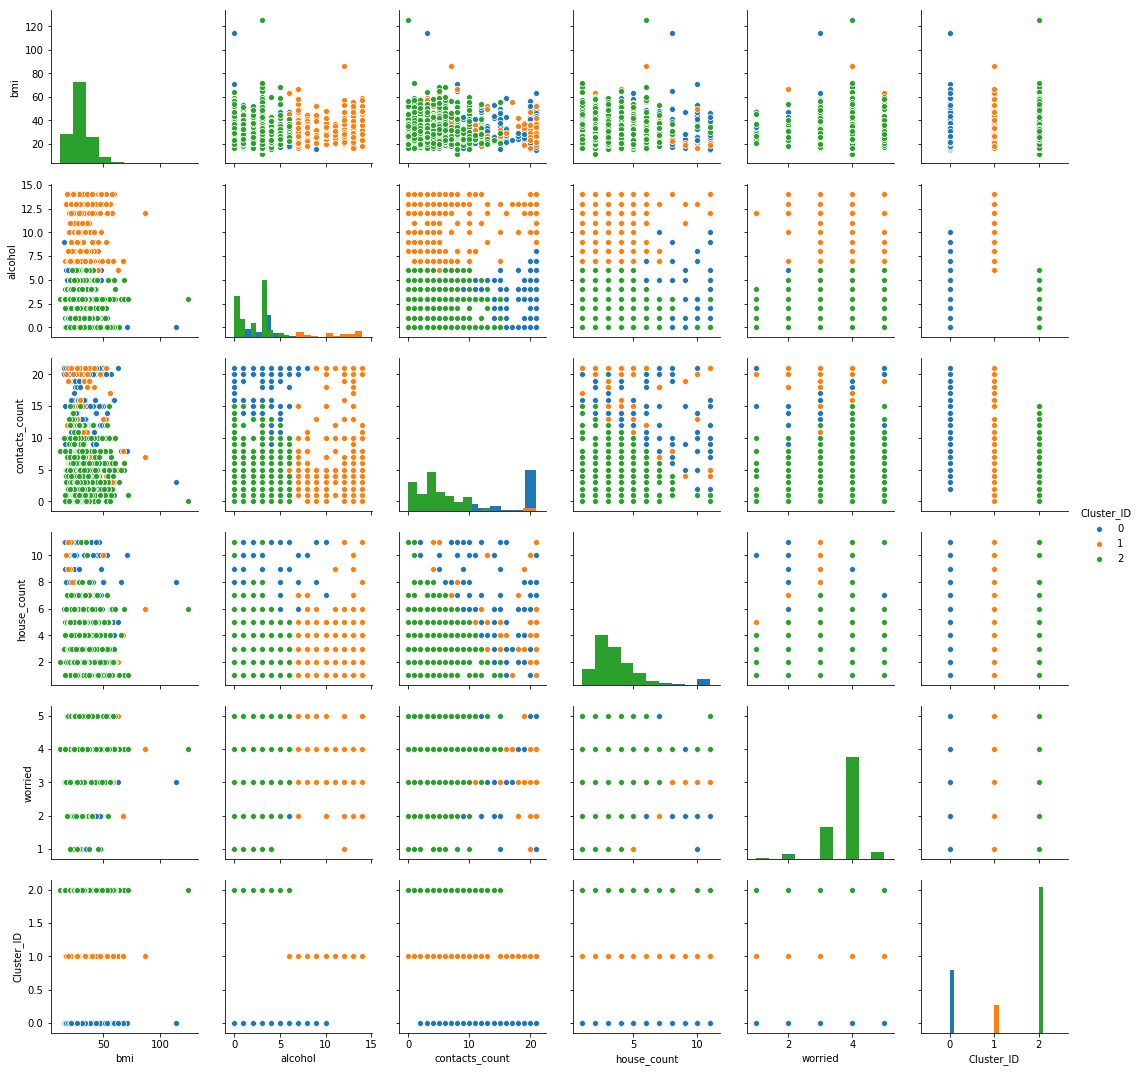

In [24]:
# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind='hist')
plt.show()

C:\Users\tamag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Cluster membership
3    710
0    415
6    347
1    335
7    254
5    229
2    150
4    102
Name: Cluster_ID, dtype: int64


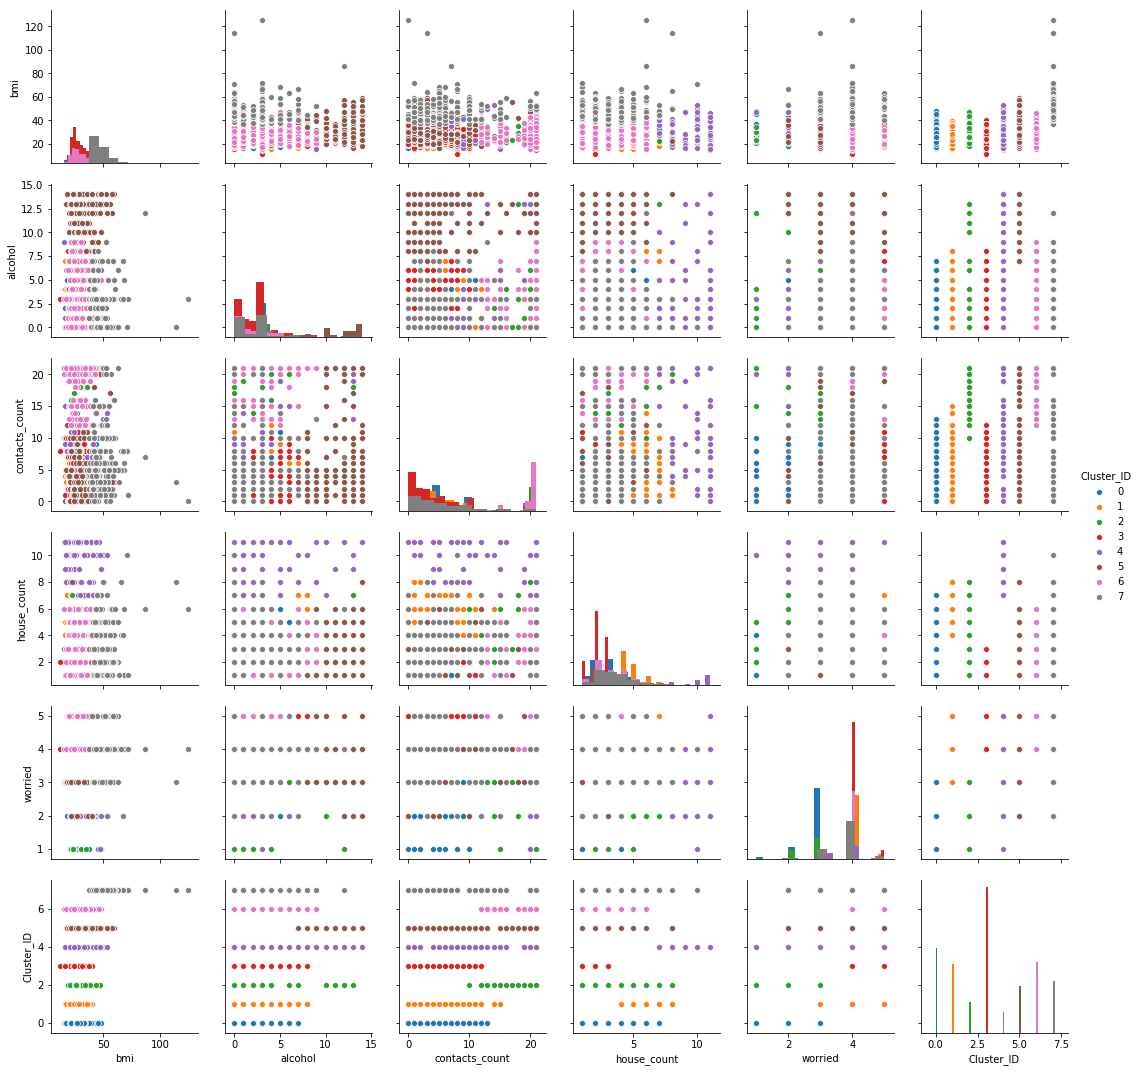

In [25]:
# n_cluster = 8
y = model_8.predict(X)
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot
cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0


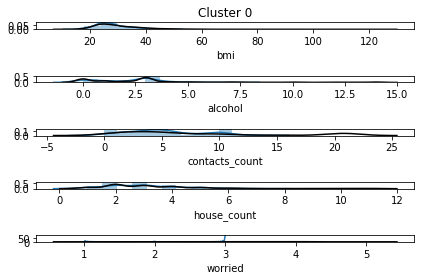

Distribution for cluster 7


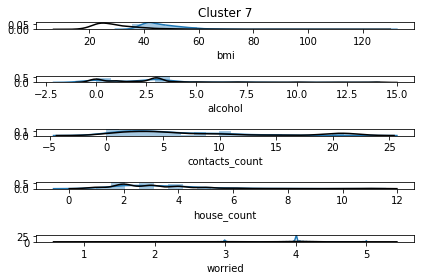

In [26]:
# prepare the column and bin size
# increase bin size to be more specific
cols = ['bmi', 'alcohol', 'contacts_count', 'house_count', 'worried']
n_bins = 20

# inspecting cluster 1 and 9
clusters_to_inspect = [0, 7]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

Distribution for cluster 0


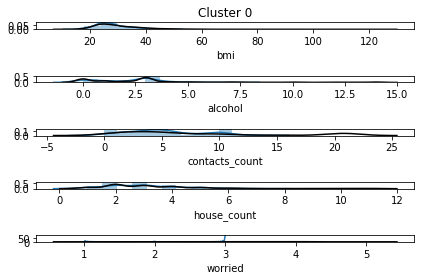

Distribution for cluster 7


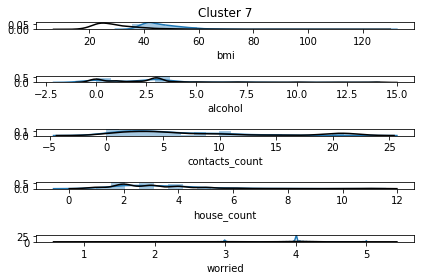

In [27]:
# prepare the column and bin size
# increase bin size to be more specific
cols = ['bmi', 'alcohol', 'contacts_count', 'house_count', 'worried']
n_bins = 20

# inspecting cluster 1 and 9
clusters_to_inspect = [0, 7]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

1. Cluster 0: Slightly left leaning ```bmi``` level, slightly right lean ```contacts_count```, and left leaning ```worried``` level  
2. Cluster 7: Right leaning ```bmi``` level, no obvious lean for  ```contacts_count```, and right leaning ```worried``` level
The other factors of both clusters are approximately at the same level ```alcohol```, ```insurance```, are both ```immigrants```.

In [30]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

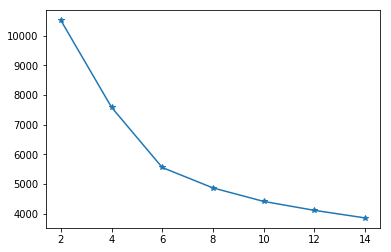

In [31]:
# plot the inertia vs K values
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.show()

Here, the elbow is somewhere at 6, where this will be selected as the optimal **K**.

In [32]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.2679950543622213
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.28925567469183083
KMeans(random_state=42)
Silhouette score for k=8 0.24962075253750352


```silhouette_score``` returns a mean silhouette score of **0.27** for **K**=4, **0.29** for **K**=6, and **0.25** for **K**=8  
This shows clusters in **K**=6 are more appropriately matched to its own cluster  
Therefore, we will choose **K**=6 on the basis of this score.

### 2-3-a Visualization (using ```pairplot```)

Sum of intra-cluster distance: 5557.9473610761415
Centroid locations:
[ 1.78714519 -0.25568634 -0.35791233  0.054874    0.25516541]
[-0.12469752 -0.24191796  1.66945259 -0.12240451  0.21619059]
[-0.27582498 -0.2615768  -0.19536459 -0.150144   -1.49453602]
[ 6.27719614e-02  2.53276994e+00 -1.81542098e-01 -2.74227682e-01
  1.21776554e-03]
[-0.08080007  0.0359665   0.55845385  3.14317316 -0.07151489]
[-0.37523927 -0.30454923 -0.55339463 -0.227109    0.55708806]


C:\Users\tamag\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Cluster membership
5    976
2    472
1    428
0    305
3    236
4    125
Name: Cluster_ID, dtype: int64


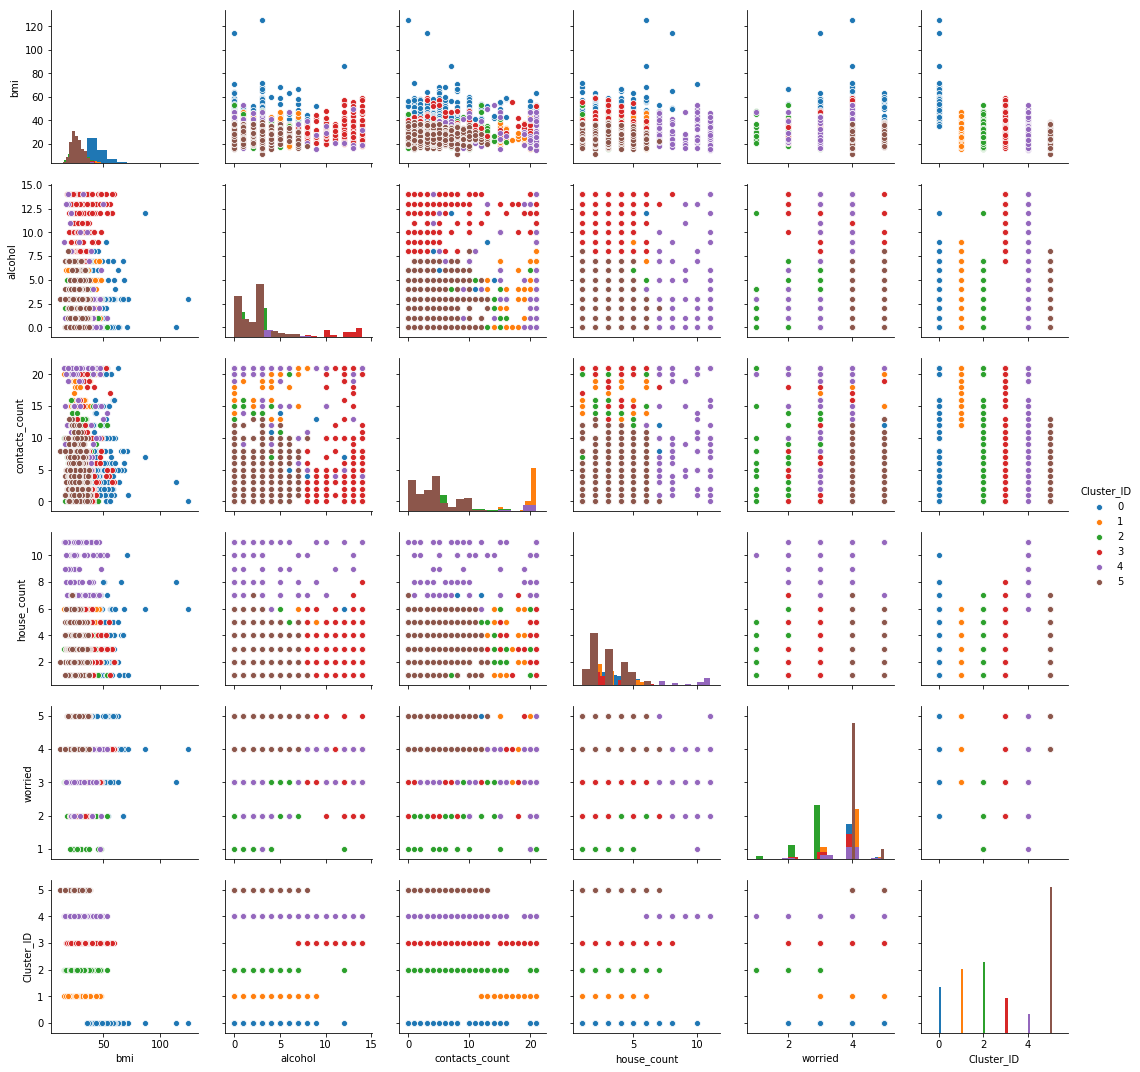

In [33]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=6, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

### 2-3-b Characterize (using cluster distribution)

Distribution for cluster 0


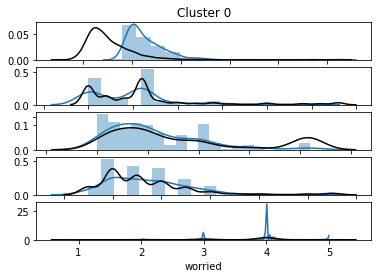

Distribution for cluster 1


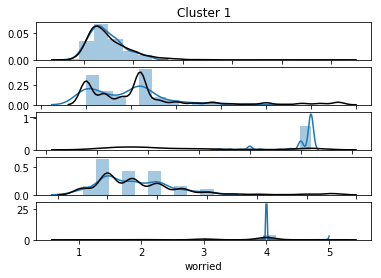

Distribution for cluster 2


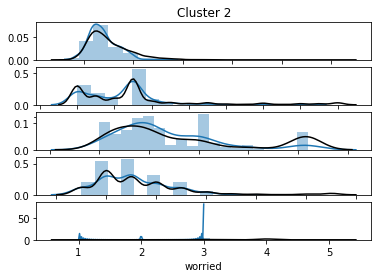

Distribution for cluster 3


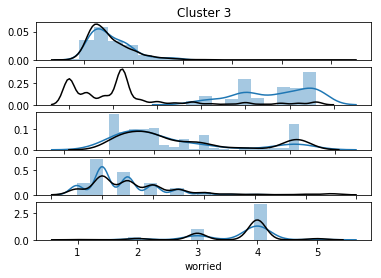

Distribution for cluster 4


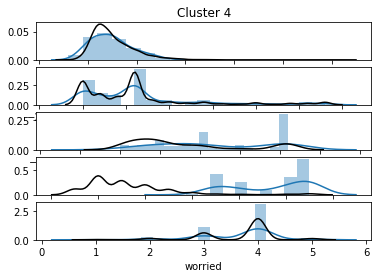

Distribution for cluster 5


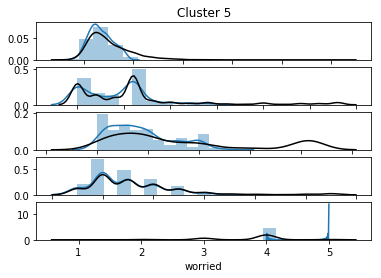

In [34]:
import warnings
warnings.filterwarnings("ignore")

# prepare the column and bin size
# increase bin size to be more specific
cols = ['bmi', 'alcohol', 'contacts_count', 'house_count', 'worried']
n_bins = 20

# inspecting cluster 0 to 5 
for cluster in range(0, 6):
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    # plt.tight_layout()
    plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_model.fit(X[:50]) # subset of X, only 50 data points

AgglomerativeClustering(n_clusters=3)

In [36]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

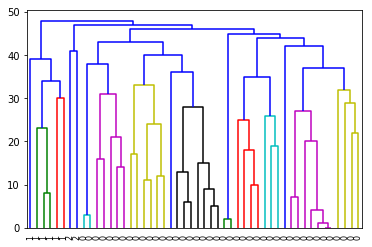

In [37]:
plot_dendrogram(agg_model, labels=agg_model.labels_)
plt.show()

## 2-4 Build another clustering model

### 2-4-c using ```K-prototypes```

In [38]:
df = pd.read_csv('D2.csv')

In [39]:
# change age type with age_map
age_map = {'30_40':4 ,'70_80':8, '50_60':6, '20_30':3, '60_70':7, '40_50':5, 
               '80_90':9,'90_100':10, '10_20':2,'0_10':1, '100_110':11}
df['age'] = df['age'].map(age_map)

In [40]:
df_positive = df[df['covid19_positive'] == True]

In [41]:
df['bmi'] = round((df['weight'] / (df['height'] / 100)**2), 3)

In [42]:
df_KP = df[['age', 'bmi', 'alcohol', 'contacts_count', 'house_count', 'worried']]

In [43]:
# convert df to matrix
X = df_KP.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

Cluster membership
1    1817
3    1354
2    1176
5     952
4     491
0     320
Name: Cluster_ID, dtype: int64


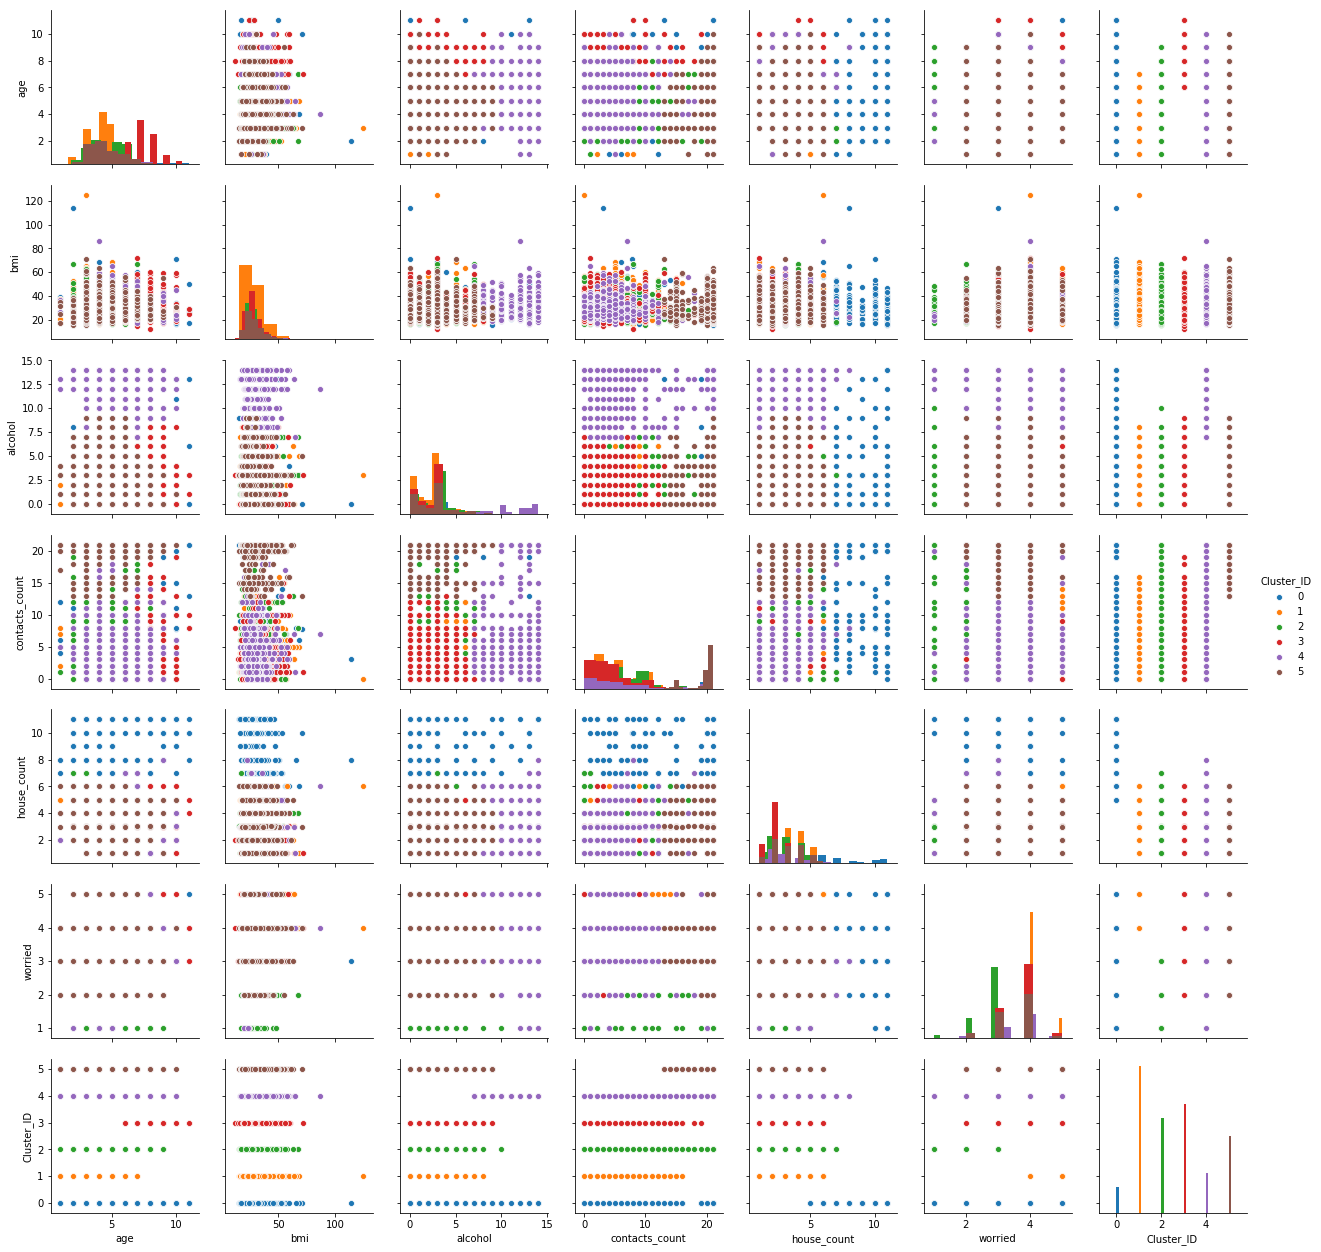

In [45]:
# optimal k from previous task
optimal_k = 6

model = KPrototypes(n_clusters=optimal_k, random_state=rs, n_jobs=10)
y = model.fit_predict(X, categorical=[1])

df_KP['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df_KP['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_KP, hue='Cluster_ID',diag_kind='hist')
plt.show()